In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


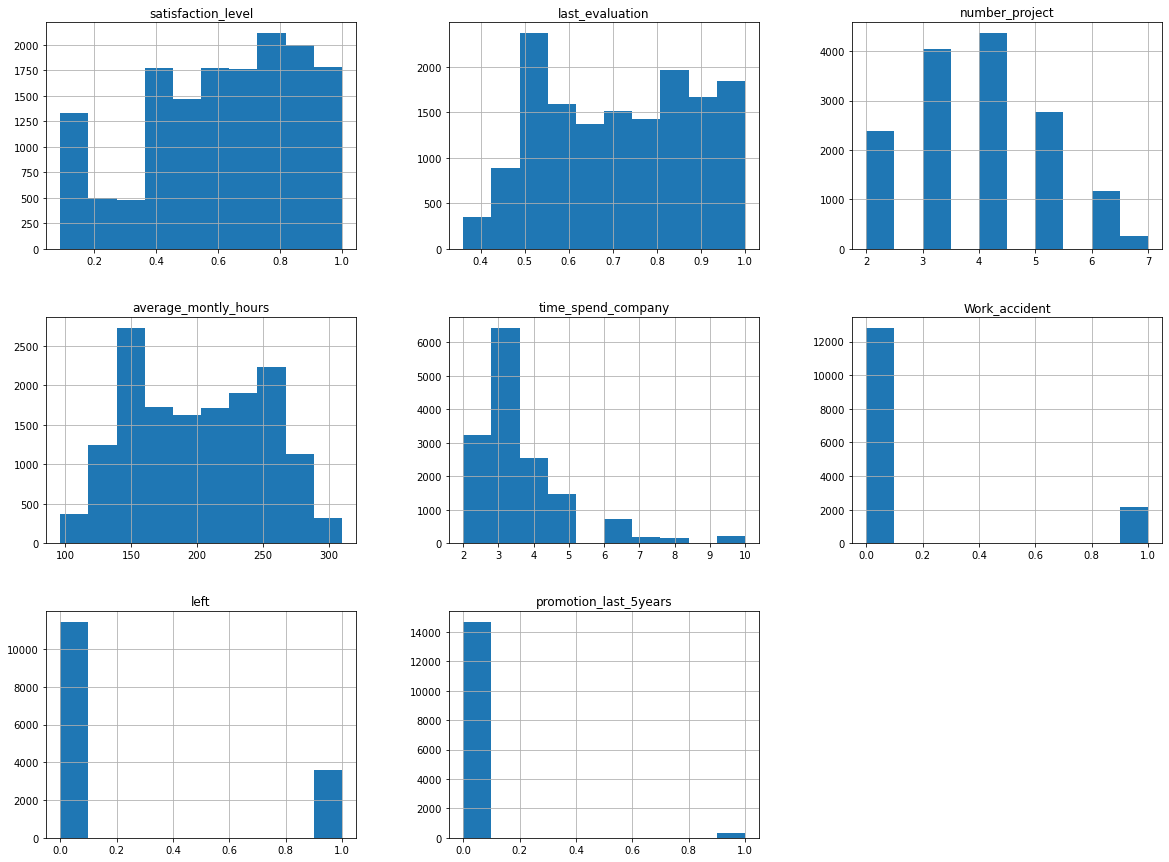

In [10]:
%matplotlib inline
df.hist(figsize=(20,15))
plt.show()

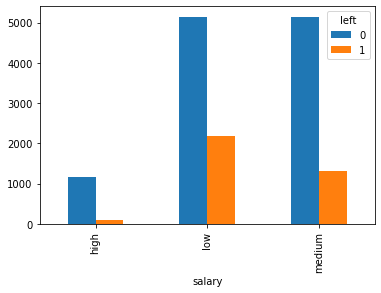

In [127]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.show()

In [126]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [12]:
df.drop(['left'], axis=1).corrwith(df['left'])

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
promotion_last_5years   -0.061788
dtype: float64

In [54]:
df['Department'].nunique()

10

In [52]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [55]:
df['salary'].nunique()

3

In [57]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

___
## Use OneHotEncoder for Department:

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [59]:
departments = pd.DataFrame(ohe.fit_transform(df[['Department']]), columns=ohe.categories_)
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
# merging the data:
df = pd.concat([df, departments], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)"
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


___
## Using OrdinalEncoding with salary column:

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
oe = OrdinalEncoder()
df.salary = oe.fit_transform(df[['salary']])

In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)"
0,0.38,0.53,2,157,3,0,1,0,sales,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  float64
 10  (IT,)                  14999 non-null  float64
 11  (RandD,)               14999 non-null  float64
 12  (accounting,)          14999 non-null  float64
 13  (hr,)                  14999 non-null  float64
 14  (management,)          14999 non-null  float64
 15  (m

___
## Dropping categorical features

In [86]:
s = df.dtypes == 'object'
obj_cols = list(s[s].index)
df.drop(df[obj_cols], axis=1, inplace=True)

In [88]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)"
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


___
## Specifing features and target data:

In [90]:
x = df.drop(['left'], axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)"
0,0.38,0.53,2,157,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

___
## Splitting the data into train and test data:


In [31]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
x_train.shape

(11999, 18)

In [94]:
x_test.shape

(3000, 18)

___
## Using Logistic regression Models:

In [97]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.preprocessing import MinMaxScaler 

In [104]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [105]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [107]:
prediction = model1.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [108]:
model1.score(x_test, y_test)

0.7566666666666667

___
## Another features:

In [110]:
x = df.iloc[:, :9].drop(['left'], axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1.0
1,0.80,0.86,5,262,6,0,0,2.0
2,0.11,0.88,7,272,4,0,0,2.0
3,0.72,0.87,5,223,5,0,0,1.0
4,0.37,0.52,2,159,3,0,0,1.0


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [113]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [114]:
model2.score(x_test, y_test)

0.757

___
## Another set of features:

In [116]:
x = df.iloc[:, :5]
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [118]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [119]:
model3 = LogisticRegression()
model3.fit(x_train, y_train)

LogisticRegression()

In [121]:
model3.score(x_test, y_test)

0.756

In [131]:
prediction_ = model3.predict_proba(x_test)
print(prediction_)

[[0.87287101 0.12712899]
 [0.93678914 0.06321086]
 [0.82660054 0.17339946]
 ...
 [0.89045529 0.10954471]
 [0.87638042 0.12361958]
 [0.73718197 0.26281803]]
